# Task 2

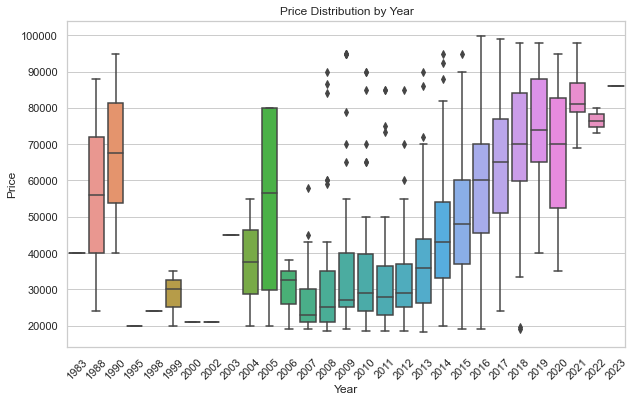

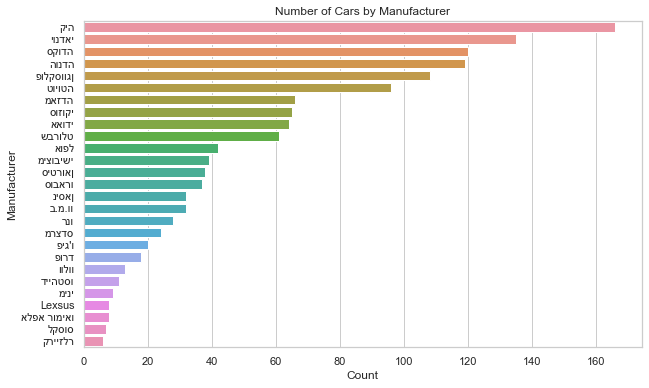

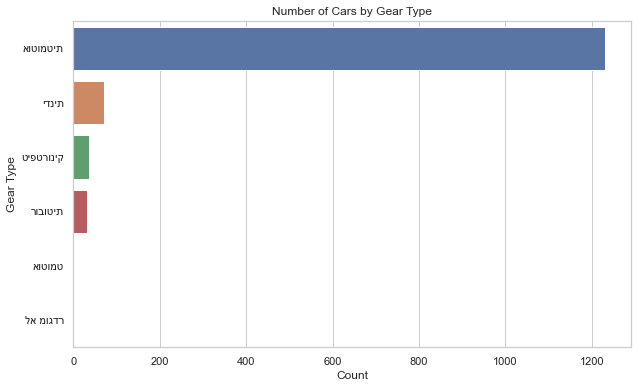

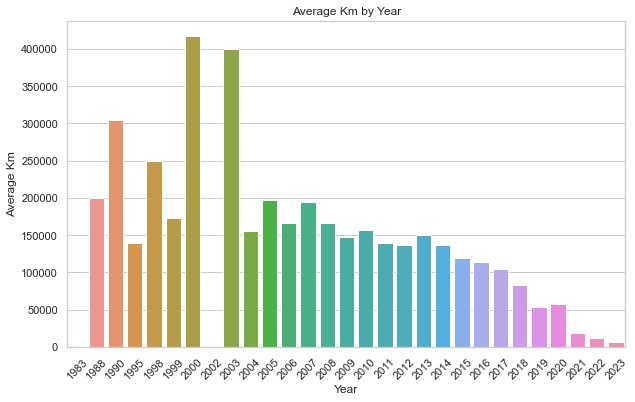

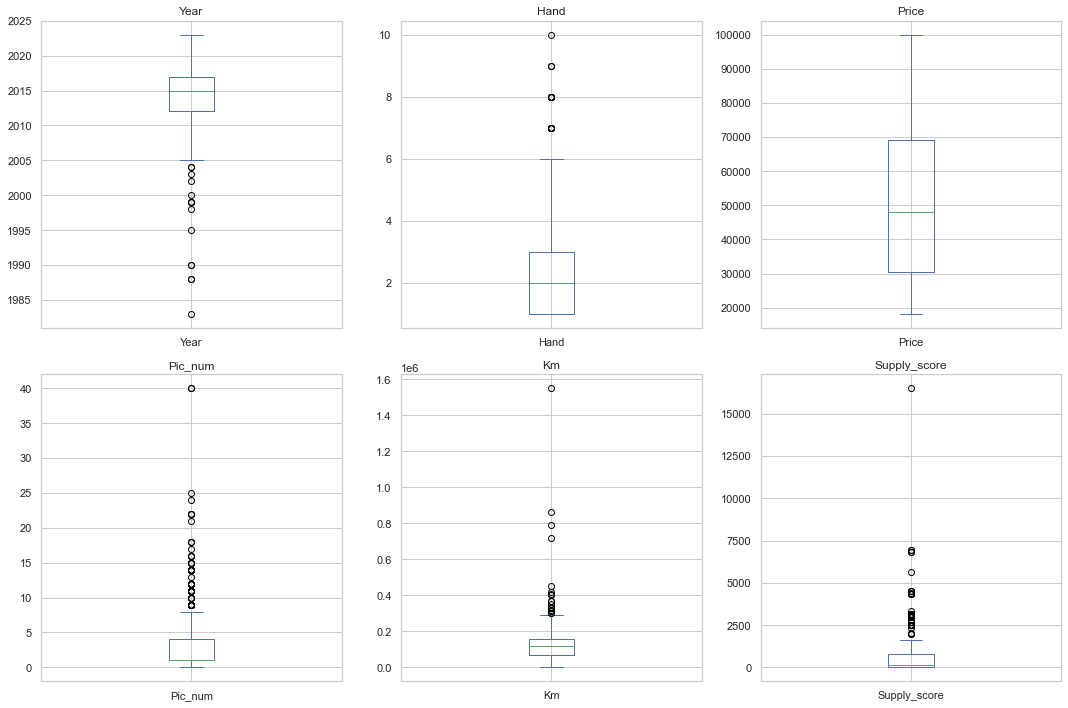

Remaining null values in Km column: 0
Remaining null values in Gear column: 0
Remaining null values in capacity_Engine column: 0
Remaining null values in Color column: 0
Remaining null values in Engine_type column: 0
Remaining null values in Pic_num: 0
Remaining null values in Cre_date: 0
Remaining null values in Repub_date: 0
Remaining null values in Prev_ownership: 0
Remaining null values in Curr_ownership: 0


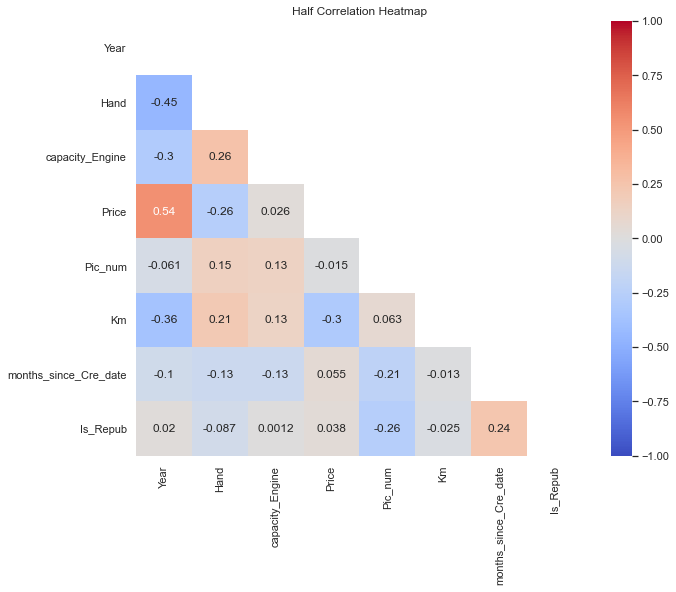

Top 5 features by PPS:
            x   ppscore
0        Year  0.305668
1       model  0.210855
2          Km  0.152563
3  manufactor  0.077732
4        Hand  0.058074
Missing values in encoded_df: 0
Data preparation complete.


,Year,Hand,capacity_Engine,Price,Pic_num,Km,months_since_Cre_date,Is_Repub,Gear_טיפטרוניק,Gear_ידנית,...,Color_לבן,Color_לבן מטאלי,Color_לבן פנינה,Color_לבן שנהב,Color_סגול,Color_סגול חציל,Color_שחור,Color_שמפניה,Color_תכלת,Color_תכלת מטאלי
0,0.168758,-0.260261,-0.055829,51000,-0.179161,0.321140,-1.108874,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.933473,-1.057930,-0.742242,49000,-0.754661,-0.564171,0.967991,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.105767,-1.057930,-0.313234,22500,-0.466911,0.332944,0.137245,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.423663,-1.057930,-0.055829,63000,0.684089,-1.056403,-2.493450,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.595957,-1.057930,-0.659873,37000,-0.466911,-0.552366,0.691075,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import ppscore as pps
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt


def prepare_data(file_path):
    # Load the dataset from the provided file path
    df = pd.read_csv(file_path)
    
    # Drop duplicate rows
    df = df.drop_duplicates()
    
    # Convert columns with numeric data to proper types
    def convert_to_numeric(df):
        '''Convert specific columns to their appropriate numeric types.
           Year is converted to a datetime year.
           Price and 'Km' are converted to numeric, coercing errors to NaN.'''
        
        df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year
        df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
        df['Km'] = pd.to_numeric(df['Km'], errors='coerce')
        return df
    
    df = convert_to_numeric(df)
    
    # Set the style of seaborn
    sns.set(style="whitegrid")

    # Plot price distribution by year
    def plot_price_distribution(df):
        'Plot a boxplot showing the distribution of car prices by year.'
        
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Year', y='Price', data=df)
        plt.title('Price Distribution by Year')
        plt.xlabel('Year')
        plt.ylabel('Price')
        plt.xticks(rotation=45)
        plt.show()
    
    plot_price_distribution(df)

    # Plot number of cars by manufacturer
    def plot_cars_by_manufacturer(df):
        'Plot a countplot showing the number of cars by each manufacturer.'
        
        plt.figure(figsize=(10, 6))
        sns.countplot(y='manufactor', data=df, order=df['manufactor'].value_counts().index)
        plt.title('Number of Cars by Manufacturer')
        plt.xlabel('Count')
        plt.ylabel('Manufacturer')
        plt.show()
    
    plot_cars_by_manufacturer(df)

    # Plot number of cars by gear type
    def plot_cars_by_gear(df):
        'Plot a countplot showing the number of cars by gear type.'

        plt.figure(figsize=(10, 6))
        sns.countplot(y='Gear', data=df, order=df['Gear'].value_counts().index)
        plt.title('Number of Cars by Gear Type')
        plt.xlabel('Count')
        plt.ylabel('Gear Type')
        plt.show()
    
    plot_cars_by_gear(df)

    # Plot average kilometers by year
    def plot_average_km_by_year(df):
        'Plot a barplot showing the average kilometers driven by cars each year.'

        plt.figure(figsize=(10, 6))
        average_km_by_year = df.groupby('Year')['Km'].mean().reset_index()
        sns.barplot(x='Year', y='Km', data=average_km_by_year)
        plt.title('Average Km by Year')
        plt.xlabel('Year')
        plt.ylabel('Average Km')
        plt.xticks(rotation=45)
        plt.show()
    
    plot_average_km_by_year(df)
    
    # Convert the 'Km' column to numeric, forcing errors to NaN
    df['Km'] = pd.to_numeric(df['Km'], errors='coerce')
    
    # Selecting the numerical columns
    numerical_columns = ['Year', 'Hand', 'Price', 'Pic_num', 'Km', 'Supply_score']
    
    # Create box plots for the numerical columns without handling missing values
    def plot_numerical_columns(df, numerical_columns):
        'Create box plots for the selected numerical columns.'
        
        plt.figure(figsize=(15, 10))
        for i, col in enumerate(numerical_columns, 1):
            plt.subplot(2, 3, i)
            df[col].dropna().plot(kind='box')
            plt.title(col)
        plt.tight_layout()
        plt.show()
    
    plot_numerical_columns(df, numerical_columns)
    
    # Clean 'Km' column. 
    def clean_km_column(df):
        "Clean the 'Km' column by removing commas and converting it to numeric."
        
        df['Km'] = df['Km'].astype(str).str.replace(',', '').str.strip()
        df['Km'] = pd.to_numeric(df['Km'], errors='coerce')
        return df
    
    df = clean_km_column(df)
    
    # Fill null values in 'Km' column with mean values
    
    def fill_null_km_with_mean(df):
        
        '''Fill null values in the 'Km' column by:
        1. Grouping by model and year and filling with the mean 'Km' of each group.
        2. Filling remaining nulls with the mean 'Km' of each year.
        3. Filling any remaining nulls with the overall mean 'Km'.'''
        
        mean_km_model_year = df.groupby(['model', 'Year'])['Km'].mean().reset_index()
        mean_km_model_year.rename(columns={'Km': 'mean_Km'}, inplace=True)
        df = df.merge(mean_km_model_year, on=['model', 'Year'], how='left')
        df['Km'].fillna(df['mean_Km'], inplace=True)
        df.drop(columns=['mean_Km'], inplace=True)
        
        mean_km_year = df.groupby(['Year'])['Km'].mean().reset_index()
        mean_km_year.rename(columns={'Km': 'mean_Km'}, inplace=True)
        df = df.merge(mean_km_year, on=['Year'], how='left')
        df['Km'].fillna(df['mean_Km'], inplace=True)
        df.drop(columns=['mean_Km'], inplace=True)
        
        overall_mean_km = df['Km'].mean()
        df['Km'].fillna(overall_mean_km, inplace=True)
        df['Km'] = df['Km'].astype(int)
        
        print("Remaining null values in Km column:", df['Km'].isnull().sum())
        return df
    
    df = fill_null_km_with_mean(df)
    
    # Replace invalid 'Gear' values with the most common value for each manufacturer
    
    def replace_invalid_gear_values(df):
        
        '''Replace invalid or missing 'Gear' values with the most common valid
           value for each manufacturer, according to the list allowed_gear_values'''
        
        allowed_gear_values = ['אוטומטית', 'טיפטרוניק', 'ידנית', 'רובוטית', 'לא מוגדר']
        
        def replace_gear_value(row, allowed_values, df):
            value = row['Gear']
            manufactor = row['manufactor']
            if pd.isna(value) or value not in allowed_values:
                most_common_gear = df[df['manufactor'] == manufactor]['Gear']
                most_common_gear = most_common_gear[most_common_gear.isin(allowed_values)].mode()
                if not most_common_gear.empty:
                    return most_common_gear.iloc[0]
                return 'לא מוגדר'
            else:
                return value
        
        df['Gear'] = df.apply(lambda row: replace_gear_value(row, allowed_gear_values, df), axis=1)
        print("Remaining null values in Gear column:", df['Gear'].isnull().sum())
        return df
    
    df = replace_invalid_gear_values(df)
    
    # Clean and fill 'capacity_Engine' column
    
    def clean_and_fill_capacity_engine(df):
        
        '''Clean the 'capacity_Engine' column by:
        1. Removing commas and converting to numeric.
        2. Filtering out outliers.
        3. Filling missing values with the median of each model, and then the overall median.'''
        
        
        df['capacity_Engine'] = df['capacity_Engine'].astype(str).str.replace(',', '')
        df['capacity_Engine'] = pd.to_numeric(df['capacity_Engine'], errors='coerce')
        
        df.loc[df['capacity_Engine'] < 800, 'capacity_Engine'] = np.nan
        df.loc[df['capacity_Engine'] > 6000, 'capacity_Engine'] = np.nan
        
        df['capacity_Engine'] = df.groupby('model')['capacity_Engine'].transform(lambda x: x.fillna(x.median()))
        
        median_capacity = df['capacity_Engine'].median()
        df['capacity_Engine'].fillna(median_capacity, inplace=True)
        df['capacity_Engine'] = df['capacity_Engine'].astype(int)
        
        print("Remaining null values in capacity_Engine column:", df['capacity_Engine'].isnull().sum())
        return df
    
    df = clean_and_fill_capacity_engine(df)
    
    # Fill missing values in 'Color' column with 'לא מוגדר'
    
    def fill_missing_color(df):
        
        df['Color'].fillna('לא מוגדר', inplace=True)
        print("Remaining null values in Color column:", df['Color'].isnull().sum())
        return df
    
    df = fill_missing_color(df)
    
    # Fill missing or invalid values in 'Engine_type' column
    
    def fill_invalid_engine_type(df):
        
        '''Fill missing or invalid values in the 'Engine_type' column by:
       After checking the site, we saw that for the engine type there are defined categories.
       After checking the unique values in the data, we saw that there is a difference between
       the source values (on the website) and the values in the data, so we used a replacement function.'''
        
        allowed_engine_values = ['בנזין', 'דיזל', 'גז', 'היבריד', 'חשמלי']
        df['Engine_type'] = df['Engine_type'].replace('היברידי', 'היבריד')
        df['Engine_type'] = df['Engine_type'].replace('טורבו דיזל', 'דיזל')
        

        # Filter models that appear only once and have a null value in 'Engine_type'
        unique_models = df['model'].value_counts()
        single_appearance_models = unique_models[unique_models == 1].index
        df = df[~(df['model'].isin(single_appearance_models) & df['Engine_type'].isnull())].copy()

        'Filling missing values with the most common value for each model:'
        
        for model in df['model'].unique():
            model_filter = df['model'] == model
            engine_type_mode = df.loc[model_filter & df['Engine_type'].isin(allowed_engine_values), 'Engine_type'].mode()
            if not engine_type_mode.empty:
                most_common_engine_type = engine_type_mode[0]
                df.loc[model_filter & (df['Engine_type'].isnull() | ~df['Engine_type'].isin(allowed_engine_values)), 'Engine_type'] = most_common_engine_type
        
        print("Remaining null values in Engine_type column:", df['Engine_type'].isnull().sum())

        return df
    
    df = fill_invalid_engine_type(df)
    
    # Convert 'Pic_num' to zero if invalid and then to integer
    def convert_pic_num(df):
        """
        Convert 'Pic_num' values to zero if they are invalid, and then to integer type.
        """
        def pic_convert_to_zero(val):
            try:
                return int(val)
            except (ValueError, TypeError):
                return 0
        
        df['Pic_num'] = df['Pic_num'].apply(pic_convert_to_zero)
        df['Pic_num'] = df['Pic_num'].astype(int)
        print("Remaining null values in Pic_num:", df['Pic_num'].isnull().sum())
        return df
    
    df = convert_pic_num(df)
    
    # Convert serial dates to datetime format
    def convert_serial_dates(df, column):
        """
        Convert Excel serial dates to normal datetime format in the specified column.
        """
        def excel_date_to_datetime(excel_date):
            try:
                epoch_start = datetime(1900, 1, 1)
                delta_days = timedelta(days=int(excel_date))
                return epoch_start + delta_days
            except ValueError:
                return pd.to_datetime(excel_date, errors='coerce')
        
        def is_not_date(value):
            try:
                pd.to_datetime(value, format='%d/%m/%Y', errors='raise')
                return False
            except ValueError:
                return True
        
        df['Non_Date_Values'] = df[column].apply(lambda x: x if is_not_date(x) else '')
        df['Converted_Date_Values'] = df[column].apply(lambda x: excel_date_to_datetime(x) if is_not_date(x) else pd.to_datetime(x, format='%d/%m/%Y'))
        df[column] = df['Converted_Date_Values']
        df.drop(columns=['Non_Date_Values', 'Converted_Date_Values'], inplace=True)
        return df
    
    df = convert_serial_dates(df, 'Cre_date')
    df = convert_serial_dates(df, 'Repub_date')
    print("Remaining null values in Cre_date:", df['Cre_date'].isnull().sum())
    print("Remaining null values in Repub_date:", df['Repub_date'].isnull().sum())
    
    # Fill missing values in ownership columns
    def fill_ownership_columns(df, columns, default_value='לא מוגדר'):
        """
        Fill missing values in the specified ownership columns with a default value.
        """
        for column in columns:
            df[column].replace({None: default_value, 'None': default_value}, inplace=True)
            df[column].fillna(default_value, inplace=True)
        return df
    
    df = fill_ownership_columns(df, ['Prev_ownership', 'Curr_ownership'])
    print("Remaining null values in Prev_ownership:", df['Prev_ownership'].isnull().sum())
    print("Remaining null values in Curr_ownership:", df['Curr_ownership'].isnull().sum())
    
    # Feature engineering
    def feature_engineering(df):
       
        current_date = datetime.now()
        
        
        ''' We created a column where you can see how long the ad has been around in months.
            The reason for this is that an ad that is on the site for a long time may indicate that
            the vehicle is less attractive or that the cost of the vehicle does not match its value.'''

        
        def calculate_months_difference(start_date, end_date):
            return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month
        df['months_since_Cre_date'] = df['Cre_date'].apply(lambda x: calculate_months_difference(x, current_date))
       
    
        '''We created a column whose purpose was whether the ad was repub or updated '''
        df['Is_Repub'] = (df['Repub_date'] == df['Cre_date']).astype(int)
        return df
    
    df = feature_engineering(df)
    
    
    # Drop unnecessary columns
    
    '''We will now explain why we dropped each of these columns:
        the 'Test' and 'Supply_score' columns because the vast majority of the data in this columns were empty 
        and we could not learn a pattern of behavior from these arrays. '''
    
    '''We decided to remove the column 'Description' because the information contained in the column was in the form of text,
        which was difficult for us to process and analyze.'''
    
    '''We decided to take down the columns 'Cre_date' and 'Repub_date' because we made a feature engineering
        in them and therefore we didn't want it to be multicollinearity in our model  so we remove them '''
    
    '''First of all, rationally there should be no connection between the price of the car and the place of residence.
        Second, we tested these columns in the model and saw that they raise the rmse substantially.
        In addition, it is important to emphasize that we performed complex functions on them
        in which we filled in missing values,
        for example we filled in the value of a city by the most frequent city in that area.
        We replaced values of cities that were written in a similar way to cities such as
        [ת''א, תל אביב, תל אביב יפו] in order to improve the accuracy of the model,
        but despite this there was no improvement, only a deterioration.'''
    df.drop(columns=['Area', 'City', 'Description', 'Supply_score', 'Test', 'Cre_date', 'Repub_date'], inplace=True)
    
   # Calculate correlation and PPS
    def calculate_correlations(df):
        """
        Calculate the correlation matrix and the Predictive Power Score (PPS) for the dataframe.
        We tested by pps the most significant features for the model, but nevertheless we took it with a limited
        guarantee by testing rmse and selecting features combined between them.
        """
        correlation_matrix = df.corr()
        
        plt.figure(figsize=(10, 8))
        mask = np.zeros_like(correlation_matrix, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, mask=mask)
        plt.title('Half Correlation Heatmap')
        plt.show()
        
        pps_matrix = pps.predictors(df, 'Price')
        top_5_features = pps_matrix.sort_values(by='ppscore', ascending=False).head(5)
        top_5_features_summary = top_5_features[['x', 'ppscore']]
        print("Top 5 features by PPS:")
        print(top_5_features_summary)
    
    calculate_correlations(df)
    """
    1. *Year (PPS: 0.305668)
       - Impact: Strong positive influence on property prices.

    2. *Model (PPS: 0.210929)
       - Impact: Positive influence. Different property models affect prices.

    3. *Km (PPS: 0.152563)
       - Impact: Positive influence. Proximity to key areas increases prices.

    4. *Manufactor (PPS: 0.077732)
       - Impact: Moderate positive influence. Reputable developers can increase property value.

    5. *Hand (PPS: 0.058074)
       - Impact: Weak positive influence. Fewer previous owners can slightly increase value.
    """
    # Convert categorical columns to categories for OneHotEncoding
    df['Gear'] = pd.Categorical(df['Gear'])
    df['Engine_type'] = pd.Categorical(df['Engine_type'])
    df['Curr_ownership'] = pd.Categorical(df['Curr_ownership'])
    df['Prev_ownership'] = pd.Categorical(df['Prev_ownership'])
    
    # One Hot Encoding
    def one_hot_encode(df):
        """
        Perform one hot encoding on categorical columns.
        """
        columns_to_encode = ['Gear', 'Engine_type', 'model', 'Prev_ownership', 'Curr_ownership', 'manufactor', 'Color']
        encoder = OneHotEncoder(sparse=False, drop='first')
        encoded_columns = encoder.fit_transform(df[columns_to_encode])
        
        encoded_column_names = []
        for col, categories in zip(columns_to_encode, encoder.categories_):
            encoded_column_names.extend([f"{col}_{category}" for category in categories[1:]])
        
        encoded_df = pd.DataFrame(encoded_columns, columns=encoded_column_names)
        df = pd.concat([df.drop(columns_to_encode, axis=1).reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
        
        print("Missing values in encoded_df:", encoded_df.isnull().sum().sum())
        return df
    
    df = one_hot_encode(df)
    
    # Standardize specified columns
    def standardize_columns(df, columns_to_standardize):
        """
        Standardize the specified numerical columns using StandardScaler.
        """
        scaler = StandardScaler()
        df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])
        return df
        '''We standardize for numeric columns'''
    columns_to_standardize = ['Year', 'Hand', 'capacity_Engine', 'Km', 'Pic_num', 'months_since_Cre_date']
    df = standardize_columns(df, columns_to_standardize)
    
    print("Data preparation complete.")
    return df

file_path = r"C:\Users\itayh\Desktop\dataset .csv"
df_prepared = prepare_data(file_path)
df_prepared.head()

In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Data cleaning for df_le DataFrame
df_le = df_prepared.copy()
df_le = df_le.dropna()  # Remove missing values
df_le = df_le.replace([np.inf, -np.inf], np.nan).dropna()  # Remove infinite values

# Define the features and target variable
X = df_le.drop(columns=['Price'])  # Features
y = df_le['Price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=80)

# Build the ElasticNet model with increased iterations
model = ElasticNet(alpha=0.1, l1_ratio=1, max_iter=50000, tol=0.01)  # Adjust alpha and l1_ratio as needed

# Perform 10-fold cross-validation on the training set
cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Convert the scores to RMSE
rmse_scores = np.sqrt(-cv_scores)

# Train the model on the entire training set
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_mae = mean_absolute_error(y_test, y_pred)

# Display the results
print("\nTest RMSE: ", test_rmse)


Test RMSE:  9970.436487368986
